In [33]:
import numpy as np

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.morphology
import skimage.exposure
import skimage.measure
import skimage.segmentation

# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', palette=colors, rc={'axes.labelsize': 16})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

/Users/carlmblumenfeld/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


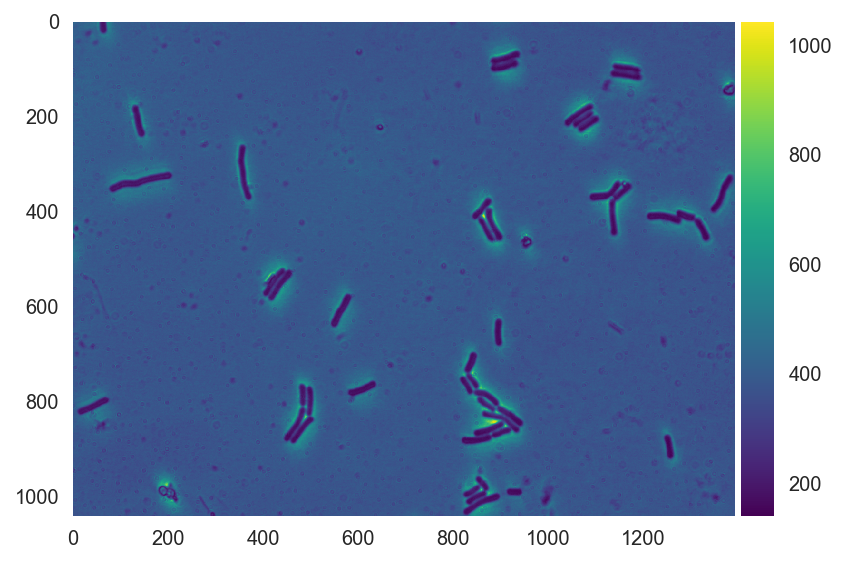

In [9]:
im_phase = skimage.io.imread('data/bsub_100x_phase.tif')

with sns.axes_style('dark'):
    skimage.io.imshow(im_phase, cmap=plt.cm.viridis)

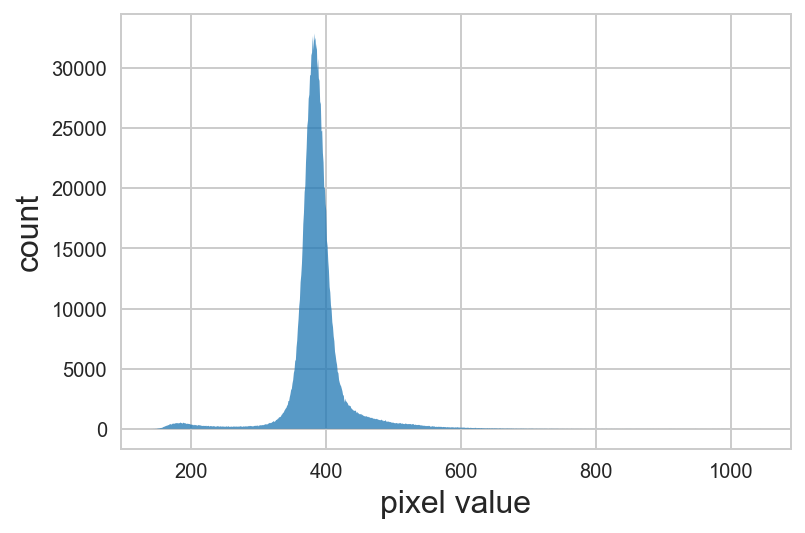

In [10]:
hist_phase, bins_phase = skimage.exposure.histogram(im_phase)

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('pixel value')
ax.set_ylabel('count')
_ = ax.fill_between(bins_phase, hist_phase, alpha=0.75)

In [11]:
thresh_phase = 300

im_phase_bw = im_phase < thresh_phase

/Users/carlmblumenfeld/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


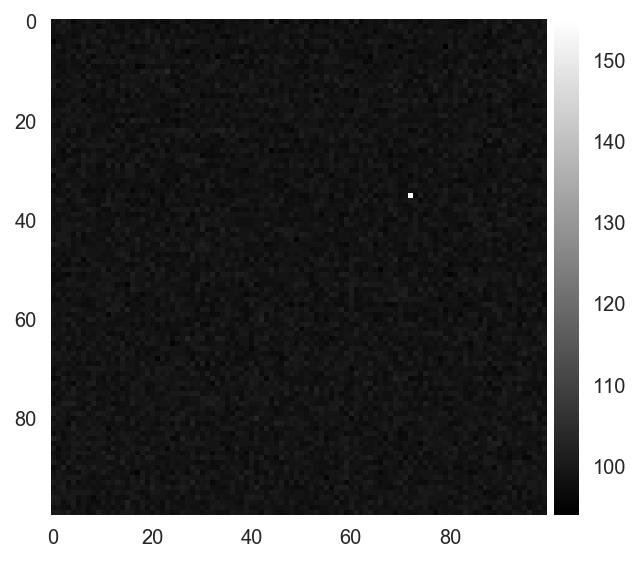

In [17]:
im_cfp = skimage.io.imread('data/bsub_100x_CFP.tif')

with sns.axes_style('dark'):
    skimage.io.imshow(im_cfp[150:250, 450:550], cmap=plt.cm.gray)


/Users/carlmblumenfeld/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


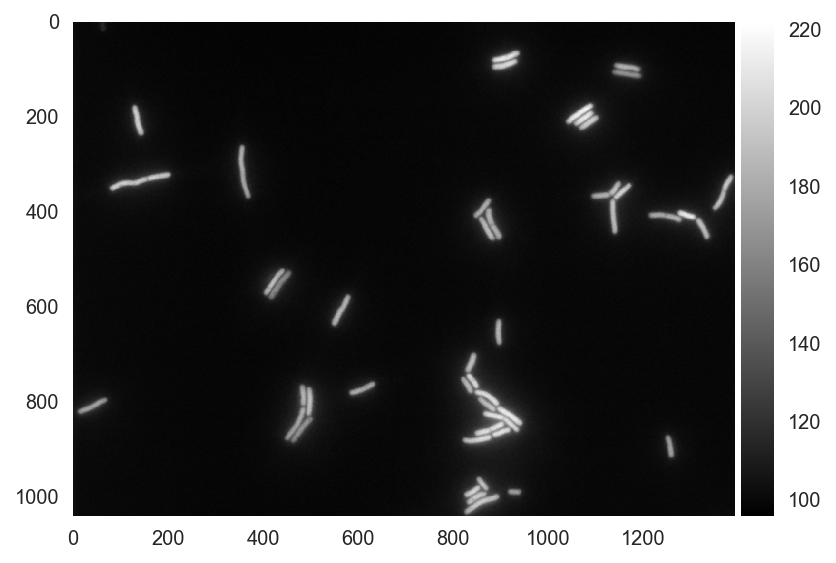

In [20]:
selem = skimage.morphology.square(3)

#Perform median filter
im_cfp_filt = skimage.filters.median(im_cfp, selem)

with sns.axes_style('dark'):
    skimage.io.imshow(im_cfp_filt, cmap=plt.cm.gray)

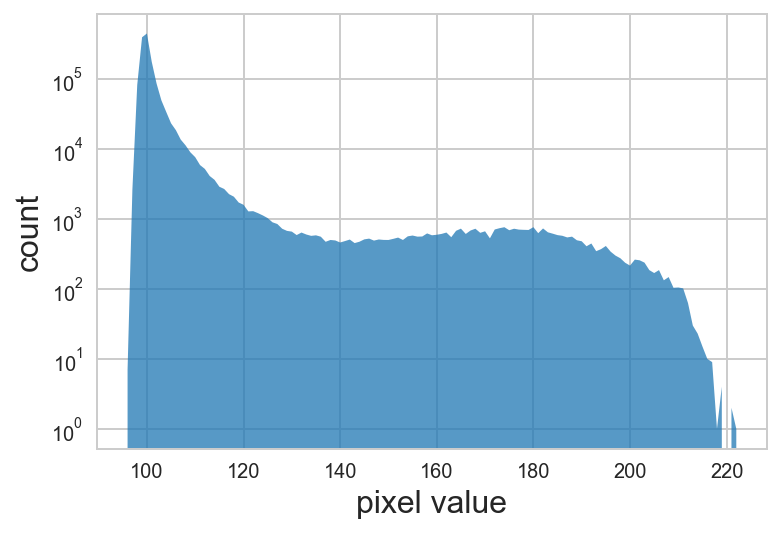

In [22]:
hist_cfp, bins_cfp = skimage.exposure.histogram(im_cfp_filt)

fig, ax = plt.subplots(1, 1)
ax.set_yscale('log')
ax.set_xlabel('pixel value')
ax.set_ylabel('count')
_ = ax.fill_between(bins_cfp, hist_cfp, alpha=0.75)



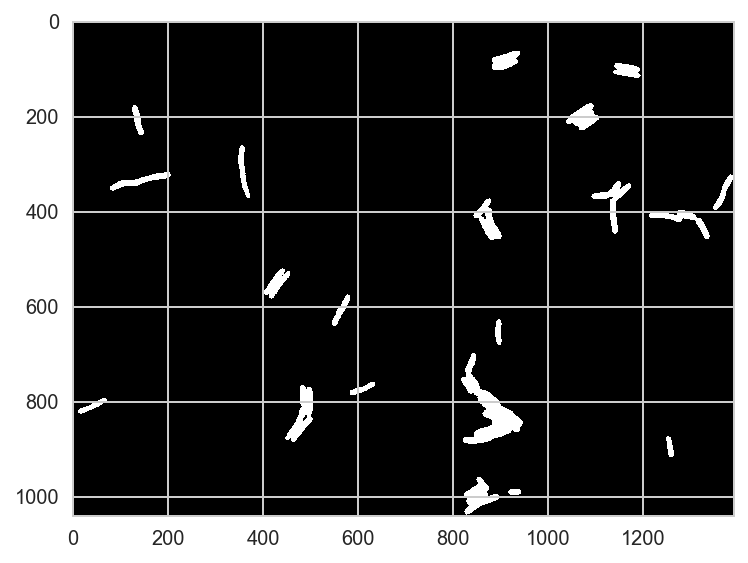

In [23]:
thresh_cfp = 140

im_cfp_bw = im_cfp_filt > thresh_cfp

skimage.io.imshow(im_cfp_bw)

In [29]:
interpixel_dist = 0.063 # microns

In [30]:
np.sum(im_cfp_bw) * interpixel_dist**2

140.72089500000001

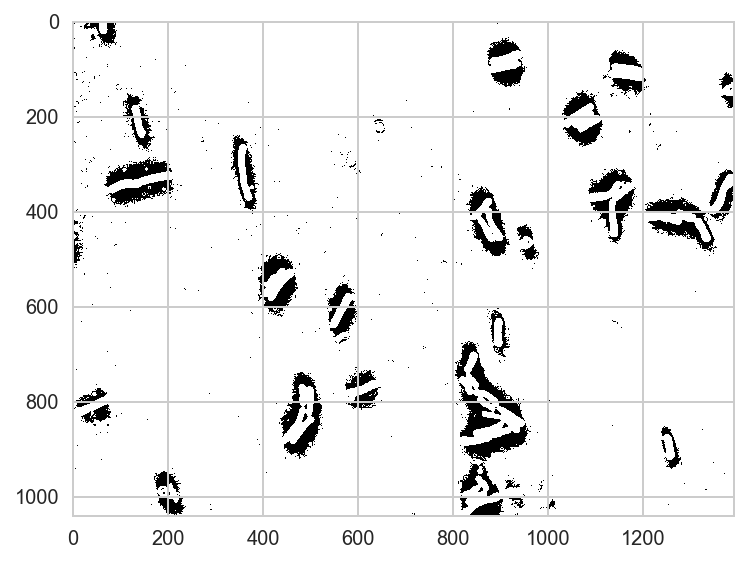

In [26]:
im_phase_bw_otsu = im_phase < skimage.filters.threshold_otsu(im_phase)

skimage.io.imshow(im_phase_bw_otsu)